# *Néolithique 'léopoldien' / 'kinshasaien'*

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

## Datierungen

### Gombe-Point (Kinshasa)

In [2]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
        WHERE ((t_Ort.ort_name) Like '%Gombe-%')""".replace('\n',' ')

df = pd.read_sql(sql, con)
# display(df.head())
len(df.index)

27

In [3]:
df.pivot_table(values = 'C14AGE', index = ['SITE'], aggfunc = [len, np.min, np.mean, np.max])

,len,amin,mean,amax
SITE,,,,
Gombe-Point,27,220,12564.444444,46500


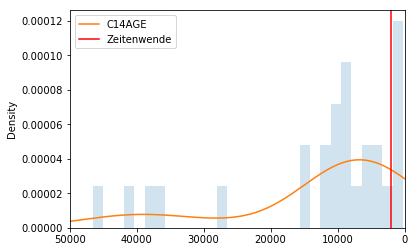

In [4]:
plt.figure()
df['C14AGE'].hist(bins = 30, normed=True, alpha=0.2).invert_xaxis()
df['C14AGE'].plot(kind = 'kde')
plt.xlim([50000,0])
plt.axvline(x = 1950, color='r', label = 'Zeitenwende')
legend = plt.legend(loc=2)
legend.get_frame().set_facecolor('white')

Eisenzeitliche Datierungen:

In [5]:
df.loc[df['C14AGE'] < 3000]

,LABNR,C14AGE,C14STD,C13,MATERIAL,SPECIES,SITE,CULTURE,PHASE,COUNTRY,LATITUDE,LONGITUDE
0,GrN-7668,2225,50,0,None,None,Gombe-Point,None,E3,COD,-4.300597,15.280791
15,GrN-7218,220,30,0,None,None,Gombe-Point,None,None,COD,-4.300597,15.280791
23,OxTL-209d,1645,110,0,None,None,Gombe-Point,None,None,COD,-4.300597,15.280791
24,OxTL-209a,1610,110,0,None,None,Gombe-Point,None,None,COD,-4.300597,15.280791
25,OxTL-209c,1600,100,0,None,None,Gombe-Point,None,None,COD,-4.300597,15.280791
26,GrN-7669,915,20,0,None,None,Gombe-Point,None,None,COD,-4.300597,15.280791


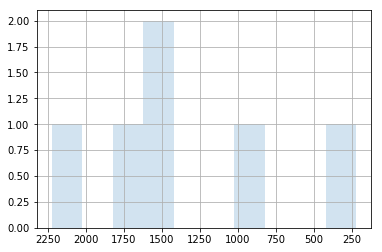

In [6]:
df['C14AGE'].loc[df['C14AGE'] < 3000].hist(alpha=0.2).invert_xaxis()